In [1]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lookout.style.typos.utils import read_frequencies

/usr/local/lib/python3.5/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Here are all tokens from out identifiers dataset

In [91]:
code = read_frequencies("data_style/3kkfreq.csv")
"Number of tokens in identifiers dataset %d" % len(code)

'Number of tokens in identifiers dataset 2930973'

## Here goes twitter dataset

I checked, those are real typos in twits, we also have frequencies for them and the correct phrases.

In [78]:
twitter = pandas.read_csv("typos-datasets/twitter.tsv", sep="\t", header=None,
                          names=["token", "correct_token", "class", "regexp", "token_split", "correct_token_split"])
twitter = twitter.drop(columns=["class", "regexp"])
twitter.head()

,token,correct_token,token_split,correct_token_split
0,york,work,to_york_from(1),to_work_from(138196)
1,prople,people,prople_to_work(1),people_to_work(138022)
2,hring,hiring,hring_people_to(1),hiring_people_to(128108)
3,prople,people,hiring_prople_to(1),hiring_people_to(128108)
4,prople,people,was_hiring_prople(1),was_hiring_people(127860)


In [79]:
twitter["typo_freq"] = twitter["token_split"].apply(lambda x: int(x.split("(")[1].split(")")[0]))
twitter["freq"] = twitter["correct_token_split"].apply(lambda x: int(x.split("(")[1].split(")")[0]))
twitter[["token_split", "correct_token_split"]] = twitter[["token_split", "correct_token_split"]].applymap(
    lambda x: " ".join(x.split("(")[0].split("_")))
twitter.head()

,token,correct_token,token_split,correct_token_split,typo_freq,freq
0,york,work,to york from,to work from,1,138196
1,prople,people,prople to work,people to work,1,138022
2,hring,hiring,hring people to,hiring people to,1,128108
3,prople,people,hiring prople to,hiring people to,1,128108
4,prople,people,was hiring prople,was hiring people,1,127860


In [85]:
twitter_words = set(twitter["correct_token"])
common = twitter_words.intersection(set(code.keys()))
common_typos = set(twitter["token"]).intersection(set(code.keys()))

In [89]:
print(
"""Number of typoed phrases %d
Number of correct phrases %d 
Number of typoed tokens %d
Number of correct tokens %d
Number of typoed tokens in identifiers dataset %d
Number of correct tokens in identifiers dataset %d""" % 
    (len(twitter), len(set(twitter["correct_token_split"])), len(set(twitter["token"])), len(set(twitter["correct_token"])),
     len(common_typos), len(common)))

Number of typoed phrases 39172
Number of correct phrases 22312 
Number of typoed tokens 9294
Number of correct tokens 2466
Number of typoed tokens in identifiers dataset 5575
Number of correct tokens in identifiers dataset 2425


In [26]:
common_freqs = sorted([x for x in code.items() if x[0] in common], key=lambda x: -x[1])

# Distribution of frequencies for tokens from the intersection

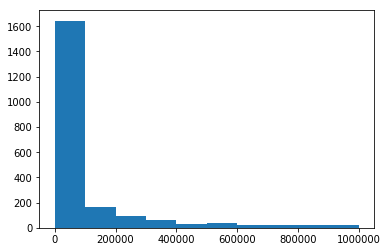

In [35]:
plt.hist([x[1] for x in common_freqs], range=[0, 1000000])
plt.show()

## Rare tokens from the intersection

In [92]:
print(common_freqs[-100:])

[('lebron', 26), ('neutrality', 25), ('bernardino', 25), ('addicted', 25), ('texting', 23), ('hilarious', 23), ('telus', 22), ('figuring', 22), ('belive', 22), ('freaking', 20), ('boyfriend', 20), ('wouldnt', 20), ('indians', 20), ('shabby', 19), ('twitterrific', 18), ('hoax', 18), ('dams', 18), ('apologies', 18), ('sanjay', 17), ('earthworm', 16), ('unveiled', 16), ('desist', 16), ('kickin', 16), ('tryin', 15), ('jailbroke', 14), ('feds', 14), ('obsessed', 13), ('hoes', 13), ('echofon', 13), ('mixtape', 13), ('murdoch', 12), ('hypocrite', 12), ('idiotic', 12), ('millionaire', 11), ('madden', 11), ('miley', 11), ('vonage', 10), ('padang', 9), ('preventative', 9), ('subsides', 8), ('buccaneers', 8), ('pissing', 8), ('dslreports', 8), ('convite', 8), ('swagg', 8), ('tylenol', 7), ('chillin', 7), ('walkee', 7), ('pandemic', 6), ('tungle', 6), ('lemme', 6), ('bowled', 6), ('celebes', 6), ('condolences', 6), ('gettin', 6), ('housewives', 5), ('jailbreaking', 5), ('killin', 5), ('limbaugh', 

## Frequent code tokens outside of the intersection (not present in twitter dataset)

In [93]:
outsiders = sorted([x for x in code.items() if x[0] not in common], key=lambda x: -x[1])
print(outsiders[:100])

[('value', 44104554), ('string', 39824289), ('self', 36629167), ('length', 30965768), ('node', 26390214), ('size', 24884937), ('index', 24820167), ('error', 22833453), ('err', 22532316), ('object', 20934995), ('event', 19537657), ('element', 19013269), ('file', 18977818), ('array', 18874401), ('path', 17023808), ('options', 16946864), ('assert', 16467356), ('context', 15536009), ('item', 15487115), ('int', 14578226), ('offset', 13042221), ('width', 12964265), ('count', 12643897), ('len', 12364875), ('input', 12058176), ('nan', 12022489), ('t', 11645319), ('buffer', 11524520), ('prototype', 11406359), ('val', 11311740), ('height', 10704448), ('base', 10486433), ('query', 10409738), ('parse', 10269617), ('p', 10171556), ('color', 10150466), ('current', 10140063), ('target', 10054058), ('field', 9944139), ('parent', 9864032), ('token', 9824264), ('style', 9730834), ('obj', 9695679), ('config', 9685239), ('arg', 9584971), ('default', 9498753), ('init', 9347927), ('mode', 9334621), ('args',

In [42]:
with open("typos-datasets/twit-voc.csv", "w") as f:
    for c in common_freqs:
        print(c[0], c[1], sep=",", file=f)

## Try running the model on the data

In [43]:
from lookout.style.typos.corrector import TyposCorrector

### I use pretrained code embeddings

In [44]:
model = TyposCorrector()
model.initialize_ranker()
model.initialize_generator(vocabulary_file="typos-datasets/twit-voc.csv",
                           frequencies_file="typos-datasets/twit-voc.csv",
                           embeddings_file="orig.bin")

### Filtering data - removing tokens like '_' and empty ones and so on

In [69]:
import string
letters = set(string.ascii_lowercase)
twitter = twitter[(twitter.correct_token.isin(common)) & ~(twitter.isna().any(axis=1)) &
                  twitter.token.apply(lambda x: set(str(x)).issubset(letters)) ]
twitter.shape

(39037, 6)

In [71]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(twitter, test_size=5000)
train.shape

(34037, 6)

In [72]:
model.train(train)

100%|██████████| 34037/34037 [05:44<00:00, 98.68it/s]  


In [73]:
model.evaluate(test)

100%|██████████| 5000/5000 [01:24<00:00, 59.31it/s]  


### Typos correction report

|        Score type        | Accuracy  | Precision |  Recall   | F1-score  |
|-------------------------:|:----------|:----------|:----------|:----------|
|                detection |    1.000  |    1.000  |    1.000  |    1.000  | 
|         correction top 1 |    0.850  |    1.000  |    0.850  |    0.919  | 
|         correction top 2 |    0.948  |    1.000  |    0.948  |    0.973  | 
|         correction top 3 |    0.976  |    1.000  |    0.976  |    0.988  | 
|       on_corrected top 1 |    0.850  |    1.000  |    0.850  |    0.919  | 
|       on_corrected top 2 |    0.948  |    1.000  |    0.948  |    0.973  | 
|       on_corrected top 3 |    0.976  |    1.000  |    0.976  |    0.988  | 


<details>
    <summary>Machine-readable report</summary>
```json
{
  "scores": {" detection": {"accuracy": 1.0, "f1": 1.0, "precision": 1.0, "recall": 1.0}, "correction top 1": {"accuracy": 0.85, "f1": 0.9189189189189189, "precision": 1.0, "recall": 0.85}, "correction 

In [94]:
def print_mistakes(typos: pandas.DataFrame, suggestions: dict, file=None):
    for id in typos.index:
        if suggestions[id][0][0] != typos.loc[id, "correct_token"]:
            print(typos.loc[id, "correct_token"], typos.loc[id, "token_split"],
                  [s[0] for s in suggestions[id][:3]], file=file)

In [75]:
sugg = model.suggest(test)

100%|██████████| 5000/5000 [01:31<00:00, 54.88it/s]  


In [95]:
print_mistakes(test, sugg)

of om google wave ['on', 'of', 'omg']
why wht would i ['what', 'why', 'who']
so yo what does ['to', 'so', 'do']
am think i av ['a', 'at', 'as']
like lite that google ['site', 'like', 'live']
or swine flu fr ['for', 'or', 'r']
sis my sim has ['him', 'im', 'slim']
of fo the cool ['to', 'of', 'do']
it ie when it ['i', 'is', 'if']
at flu shot bt ['but', 'at', 'it']
email in my ymail ['gmail', 'email', 'mail']
my mj experience with ['me', 'my', 'mb']
in her iphone im ['is', 'i', 'in']
taking google is aking ['making', 'taking', 'asking']
san flu in sao ['so', 'say', 'san']
want wat to have ['what', 'want', 'was']
games my iphone james ['names', 'games', 'james']
too tho hard to ['to', 'the', 'who']
go to gon on ['got', 'go', 'gone']
in about it im ['i', 'in', 'is']
app aps do you ['apps', 'app', 'maps']
in an earthquake jn ['on', 'in', 'an']
wii ii is a ['i', 'it', 'wii']
as vs apps on ['is', 'as', 'os']
rest and the reat ['treat', 'rest', 'read']
do iphone to jo ['to', 'do', 'go']
filling 

aol and kol for ['lol', 'aol', 'kml']
it iv in google ['i', 'is', 'it']
go did you gor ['for', 'got', 'or']
run rn in the ['on', 'run', 'an']
guys these gus are ['us', 'gps', 'guy']
an is getting un ['on', 'in', 'an']
at rt the new ['it', 'at', 'r']
oh doh i got ['do', 'dog', 'oh']
in my contacts im ['is', 'in', 'i']
looks it tooks very ['books', 'looks', 'took']
high to get hight ['night', 'might', 'right']
ist was isn google ['is', 'in', 'isnt']
am iphone and dm ['do', 'im', 'am']
got me i gt ['get', 'got', 'it']
it nt on your ['not', 'it', 'at']
apps my google aps ['maps', 'apps', 'app']
or yr iphone for ['ur', 'or', 'r']
at rt the web ['it', 'at', 'art']
in nasal spray en ['on', 'in', 'an']
guys you guyz are ['guy', 'guys', 'cuz']
ur me yr email ['or', 'ur', 'r']
who hwo has had ['how', 'who', 'two']
seo for sem help ['see', 'seo', 'seem']
is pig flu im ['i', 'is', 'in']
is but im that ['i', 'it', 'in']
so os i would ['is', 'on', 'so']
invented code was inveted ['invited', 'invente